# With new Hamiltonian ( updated by AR sir in his latest github repos)

### Mean field Floquet dynamics
Consider the Hamiltonian of the type
\begin{equation}
\hat{H}(t) = \hat{H}_0 + \left(h_0 + h \cos{(\omega t)} \right)\; \hat{H}_1,
\end{equation}

where

\begin{eqnarray}
\hat{H}_0 &=& -\frac{1}{2N}\sum_{ij}\hat{\sigma}^z_i\hat{\sigma}^z_j,\\
\hat{H}_1 &=& \sum_i\hat{\sigma}^x_i.
\end{eqnarray}

Here, we have $N$ spin-$1/2$ particles in a $1-$dimensional lattice, and $i,j$ are site indices. We will now attempt a numerical evaluation of
the Floquet eigenspectrum of this system.

First, define permutation operator $P_{ij} = \displaystyle\frac{1}{2}\left(1+ \vec{\sigma}_i\cdot\vec{\sigma}_j\right)$,
and note that $[P_{ij}, H]=0$. Thus, we can reduce the problem size from the full $2^N\times 2^N$ Hilbert space
to the subspace spanned by the degenerate eigenvectors of $P_{ij}$ corresponding to a single eigenvalue, say $1$.
This is isomorphic to the subspace spanned by degenerate eigenstates of the operator $S^2=|\vec{S}|^2$ with eigenvalue
$\displaystyle\frac{N}{2}\left(\frac{N}{2}+1\right)$, where

\begin{equation}
\vec{S}=S^x\hat{x}+S^y\hat{y}+S^z\hat{z}\equiv \sum_i \vec{\sigma}_i.
\end{equation}

Note that, since $[S^2, S^z]=0$, these are also eigenstates of $S^z$ in this so-called
TSS subspace. The corresponding eigenvalues are $Ns_n$, where $s_n=-\frac{1}{2}+\frac{n}{N}$ and the index
$n= 0 (1) N$ has $N+1$ values. Thus

\begin{equation}
S^z |s_n\rangle = Ns_n|s_n\rangle,
\end{equation}

and the matrix elements $(S^z)_{ij} = Ns_s\delta_{ij}$. Furthermore, defining ladder operators

\begin{equation}
S_\pm \equiv S^x \pm i S^y,
\end{equation}

and using the result

\begin{equation}
S_\pm |s_n\rangle = \sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n\pm 1}\right)}\;\;|s_{n\pm 1}\rangle,
\end{equation}

we can obtain the matrix elements $S^x = S_+ + S_-$ to be

\begin{multline}
(S^x)_{nm} = \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n + 1}\right)}\;\;\delta_{n+1, m}  \\
                        +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n- 1}\right)}\;\;\delta_{n-1,m}\bigg]
\end{multline}

Note that, since the Hamiltonian can be readily written as
$H(t) = -\displaystyle\frac{1}{2N}(S^z)^2 - (h_0 + h\cos{(\omega t )})S^x$, the matrix elements of
\begin{eqnarray}
\left(H_0\right)_{ij} &=& -\frac{N}{2} s^2_i \delta_{ij},\nonumber\\
\left(H_1\right)_{ij} &=& \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i + 1}\right)}\;\;\delta_{i+1, j}  \\
    & &                     +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i- 1}\right)}\;\;\delta_{i-1,j}\bigg]
\end{eqnarray}

Note that, in the continuum limit, $N\rightarrow\infty$, we can ignore the difference between adjacent values
of $s_i$. Thus, the Hamiltonian per particle becomes $h(t)\equiv \displaystyle\frac{1}{N}H(t) = h + h_0\cos{(\omega t)}h_1$, where

\begin{eqnarray}
\left(h\right)_{ij} &\approx& -\frac{1}{2} s^2_i \delta_{ij},\nonumber\\
h_0 &\rightarrow& -\frac{1}{2}s^2\\
\left(h_1\right)_{ij} &\approx& \frac{1}{2}\sqrt{\frac{1}{4} - s^2_i}\left[\delta_{i+1, j}  + \delta_{i-1,j}\right]\\
h_1 &\rightarrow& \sqrt{\frac{1}{4} - s^2_i}\;\;\cos{p},
\end{eqnarray}
where we have expanded the matrix elements in a basis of $e^{ipx}$. In this limit, we obtain the Lipkin Model (Insert from previous notebook)
.


References:

[1] Check T. Mori's paper equation (12)

#### The code below here is no "GPU" code

running for N =  7 with 4 processors
time taken 25.829909086227417 second


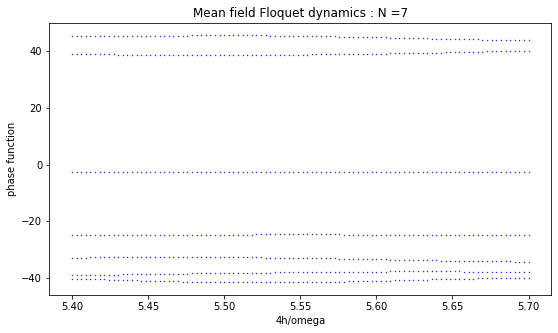

In [36]:
# scatter plot



#  THIS CODE IS DONE FOR NEWER HAMILTONIAN. THE QUASI-ENREGY ARE PLOTTED WITH SCATTER PLOT I.E. WE HAVE PLOTTED
#  ALL THE QUASI-ENERGIES IN A SCATTER PLOT FOR EACH "h". THIS WORKS ARE FOLLOWS. WE HAVE TAKEN EACH OF CHOSEN
#  h FROM "hs" AND THEN WE CALCUALTED "N" NUMBER OF QUASI-ENERGIS FOR A SPIN SYSTEM CONSISTED OF "N" NUMBER OF 
#  1D SPIN.


import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eig
import math
import time

start = time.time()

N = 7 
h0 = 0.1
omega = 40.0
w = omega
tsteps = 300
hsteps = 100
hs = np.linspace(54,57,hsteps)
ampp = (np.ones((N,len(hs))) * hs).T
psi = np.eye(N) + 1j * np.zeros((N,N))
floqEvolution_mat = np.zeros((N,N)) + 1j * np.zeros((N,N))

title = "Mean field Floquet dynamics : N =" + str(N)
filename = 'mfd_fl_'+str(N) +'imag.jpeg'
filename1 = 'mfd_fl_'+str(N) +'real.jpeg'

def floq_jac(psi0, t, h, h0, H1, H0, w):    
    drive = h0 + h * np.cos(w * t)
    jac = 1j * N * (H0 + drive * H1)    
    return jac
        
def floq_func(psi0, t, h, h0, H1, H0, w):
    floq_h = np.dot(floq_jac(psi0, t, h, h0, H1, H0, w), psi0)
    return floq_h

def floq_evolv(psi,H0,H1,h,w):
    T = 2 * np.pi/w                                             
    t = np.linspace(0,2 * np.pi/w,tsteps)                      
    floqEvolution_mat = np.zeros((N,N)) + 1j * np.zeros((N,N))
    
    for m in np.arange(N):
        psi0 = psi[m]
        psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w))
        floqEvolution_mat[m] = psi_t[-1]                 
    evals, evecs = eig(floqEvolution_mat)
    phasefunc = 1j * 2.303 * np.log(evals + 1j * 0) * omega/(2 * np.pi)
    return phasefunc.real
    
if __name__ == '__main__':
    nprocs = 4
    p = Pool(processes = nprocs)          
    print("running for N = ", N, "with",nprocs,"processors")
    start = time.time()       

    s = -0.5 + (1./N) * np.arange(N)
    H0 =  np.diagflat(0.5 * (N * s) ** 2.0)
    
    sup_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i+1]) for i in range(N-1)])
    sub_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i-1]) for i in range(N-1)])
    H1 = np.diagflat(sup_diag, k=1) + np.diagflat(sub_diag, k=-1)   
    
    data = p.starmap(floq_evolv,[(psi,H0,H1,h,w) for h in hs])
    
    print('time taken',time.time()-start,'second')
    
    plt.figure(figsize = (9,5))
    for xx in np.arange(len(hs)):
        plt.scatter(4 * ampp[xx]/omega, data[xx], color = 'blue', marker='.', s = 0.8)
    plt.title(title)    
    plt.xlabel("4h/omega")
    plt.ylabel("phase function")
    plt.show()

running for N =  6 with 4 processors
time taken 8.018424987792969 second


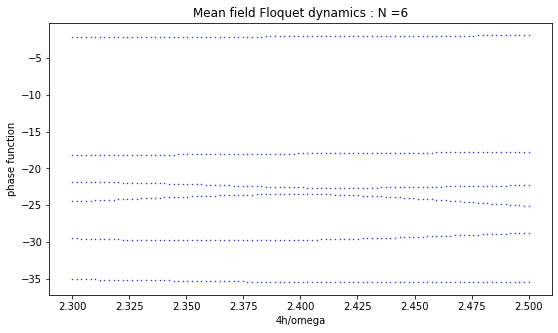

In [2]:
## experiment

# scatter plot



#  THIS CODE IS DONE FOR NEWER HAMILTONIAN. THE QUASI-ENREGY ARE PLOTTED WITH SCATTER PLOT I.E. WE HAVE PLOTTED
#  ALL THE QUASI-ENERGIES IN A SCATTER PLOT FOR EACH "h". THIS WORKS ARE FOLLOWS. WE HAVE TAKEN EACH OF CHOSEN
#  h FROM "hs" AND THEN WE CALCUALTED "N" NUMBER OF QUASI-ENERGIS FOR A SPIN SYSTEM CONSISTED OF "N" NUMBER OF 
#  1D SPIN.


import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eig
import math
import time

start = time.time()

N = 6 
h0 = 0.1
omega = 40.0
w = omega
tsteps = 1000
hsteps = 100
hs = np.linspace(23,25,hsteps)
ampp = (np.ones((N,len(hs))) * hs).T
psi = np.eye(N) + 1j * np.zeros((N,N))
floqEvolution_mat = np.zeros((N,N)) + 1j * np.zeros((N,N))

title = "Mean field Floquet dynamics : N =" + str(N)
filename = 'mfd_fl_'+str(N) +'imag.jpeg'
filename1 = 'mfd_fl_'+str(N) +'real.jpeg'

def floq_jac(psi0, t, h, h0, H1, H0, w):    
    drive = h0 + h * np.cos(w * t)
    jac = 1j * N * (H0 + drive * H1)    
    return jac
        
def floq_func(psi0, t, h, h0, H1, H0, w):
    floq_h = np.dot(floq_jac(psi0, t, h, h0, H1, H0, w), psi0)
    return floq_h

def floq_evolv(psi,H0,H1,h,w):
    T = 10 * 2 * np.pi/w                                             
    t = np.linspace(0,2 * np.pi/w,tsteps)                      
    floqEvolution_mat = np.zeros((N,N)) + 1j * np.zeros((N,N))
    
    for m in np.arange(N):
        psi0 = psi[m]
        psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w))
        floqEvolution_mat[m] = psi_t[-1]                 
    evals, evecs = eig(floqEvolution_mat)
    phasefunc = 1j * 2.303 * np.log(evals + 1j * 0) * omega/(2 * np.pi)
    return phasefunc.real
    
if __name__ == '__main__':
    nprocs = 4
    p = Pool(processes = nprocs)          
    print("running for N = ", N, "with",nprocs,"processors")
    start = time.time()       

    s = -0.5 + (1./N) * np.arange(N)
    H0 =  np.diagflat(0.5 * (N * s) ** 2.0)
    
    sup_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i+1]) for i in range(N-1)])
    sub_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i-1]) for i in range(N-1)])
    H1 = np.diagflat(sup_diag, k=1) + np.diagflat(sub_diag, k=-1)   
    
    data = p.starmap(floq_evolv,[(psi,H0,H1,h,w) for h in hs])
    
    print('time taken',time.time()-start,'second')
    
    plt.figure(figsize = (9,5))
    for xx in np.arange(len(hs)):
        plt.scatter(4 * ampp[xx]/omega, data[xx], color = 'blue', marker='.', s = 0.8)
    plt.title(title)    
    plt.xlabel("4h/omega")
    plt.ylabel("phase function")
    plt.show()

run starts !!


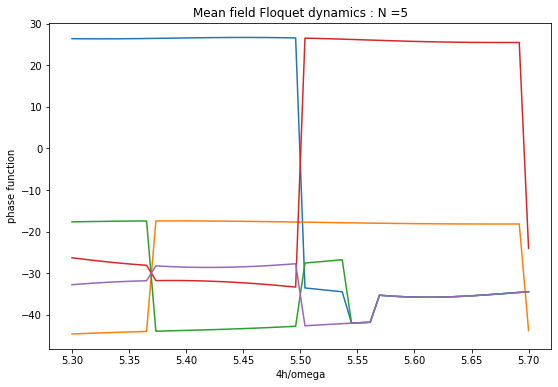

time taken 580.2476274967194 sec


In [6]:
# specific phase function path


#   NOW WE GIVE A TRY TO PLOT QUASI ENERGIES FOR A SPECIFIC PATH.
#   ACCORDING TO FLOQUET THEORY, AN  N X N UNITARY MATRIX IS CHOSEN INITIALLY, LETS CALL IT "S" MATRIX. EACH OF THE COLOUM
#   OF S MATRIX IS TAKEN AS THE INITIAL WAVE FUNCTION FOR EVOLVE. AFTER ONE PERIOD OF EVOLUTION WE GET AN N X 1 DIMENSIONAL
#   MATRIX WHICH IS THE WAVE FUNCITON DENOTING STATE OF THE SPIN SYSTEM AFTER ONE TIME PERIOD. SIMILAR WAY WE COLLECT ALL
#   OTHER "N" OF WAVE FUNCIOTN EACH WHICH IS BASICALLY COLUMN MATRIX. WE THEN BUILD ANOTHER N X N MATRIX.
#   LETS CALL THIS MATRIX AS "U" MATRIX. THE EIGEN FUNCTION OF U MATRIX 

import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot, norm, eig
import math
import time

start = time.time() 

N = 5
h0 = 0.1
omega = 40
w = omega
tsteps = 1000
hsteps = 50
T = 10 * 2 * np.pi/w
t = np.linspace(0,T,tsteps)

hs = np.linspace(53,57,hsteps)
ampp = (np.ones((N,len(hs)))*hs).T
psi = np.eye(N) + (1j) * np.zeros((N,N))
floqEvolution_mat = np.zeros((N,N)) + (1j) * np.zeros((N,N))
phasefunc_path = np.zeros(len(hs))

plt.figure(figsize = (9,6))
title = "Mean field Floquet dynamics : N =" + str(N)

def delta_func(x,y):
        if ( x == y ):
            return 1.0
        else:
            return 0.0

def floq_jac(psi0, t, h, h0, H1, H0, w):    
    drive = h0 + h * np.cos(w * t)
    jac = 1j * N * (H0 + drive * H1)    
    return jac
        
def floq_func(psi0, t, h, h0, H1, H0, w):
    floq_h = np.dot(floq_jac(psi0, t, h, h0, H1, H0, w), psi0)
    return floq_h
    
if __name__ == '__main__':     

    s = -0.5 + (1./N) * np.arange(N)
    H0 = np.diagflat(0.5 * (N * s) ** 2.0)
    
    sup_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i+1]) for i in range(N-1)])
    sub_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i-1]) for i in range(N-1)])
    H1 = np.diagflat(sup_diag, k=1) + np.diagflat(sub_diag, k=-1)   
    
    print('run starts !!')
    for nn in np.arange(N):                     # nn will decide the initial wavefunction
        pp = nn
        labelname = 'wave func_' + str(nn)
        filename = str(N) + '_wave_' + str(nn)+ '.txt'
        
        # calculate for first "h"
        h = hs[0]           
        floqEvolution_mat = np.zeros((N,N)) + 1j * np.zeros((N,N))
        for mm in np.arange(N):
            psi0 = psi[mm]  
            psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w), Dfun=floq_jac)
            floqEvolution_mat[mm] = psi_t[-1]         
        evals, evecs = eig(floqEvolution_mat)
        evecs = np.asarray(list(map(lambda x :x/np.linalg.norm(x),evecs)))
        phasefunc = 2.303 * np.log(evals[nn] + 1j * 0) * 1j * omega/(2 * np.pi)
        evecs_path = evecs[nn]               
        phasefunc_path[0] = phasefunc.real
    
        # calculate for rest of the "h"
        for cc, h in enumerate(hs[1:len(hs)]):   
            floqEvolution_mat = np.zeros((N,N)) + 1j * np.zeros((N,N))        
            for mm in np.arange(N):
                psi0 = psi[mm]  
                psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w), Dfun=floq_jac)
                floqEvolution_mat[mm] = psi_t[-1] 
            evals, evecs = eig(floqEvolution_mat)
            evecs = np.asarray(list(map(lambda x :x/np.linalg.norm(x),evecs)))
            prob = np.asarray(list(map(lambda x:np.dot(np.conjugate(evecs_path).T,x),evecs)))
            for i,pr in enumerate(prob):
                if (pr.real == max(prob.real)):
                    pp = i
                    break
            evecs_path = evecs[pp]
            phasefunc = 2.303 * np.log(evals[pp] + 1j * 0) * 1j * omega/(2 * np.pi)
            phasefunc_path[cc+1] = phasefunc.real
        plt.plot(4*hs/w,phasefunc_path)
    plt.title(title)    
    plt.xlabel("4h/omega")
    plt.ylabel("phase function")
    plt.show()    
    print('time taken',time.time()-start,'sec')

run starts !!


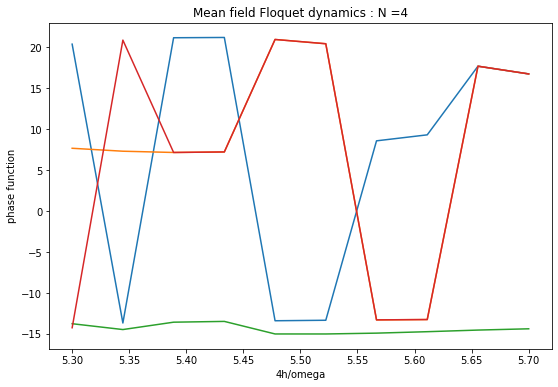

time taken 45.06024765968323 sec


In [1]:
# experiment

# specific phase function path


#   NOW WE GIVE A TRY TO PLOT QUASI ENERGIES FOR A SPECIFIC PATH.
#   ACCORDING TO FLOQUET THEORY, AN  N X N UNITARY MATRIX IS CHOSEN INITIALLY, LETS CALL IT "S" MATRIX. EACH OF THE COLOUM
#   OF S MATRIX IS TAKEN AS THE INITIAL WAVE FUNCTION FOR EVOLVE. AFTER ONE PERIOD OF EVOLUTION WE GET AN N X 1 DIMENSIONAL
#   MATRIX WHICH IS THE WAVE FUNCITON DENOTING STATE OF THE SPIN SYSTEM AFTER ONE TIME PERIOD. SIMILAR WAY WE COLLECT ALL
#   OTHER "N" OF WAVE FUNCIOTN EACH WHICH IS BASICALLY COLUMN MATRIX. WE THEN BUILD ANOTHER N X N MATRIX.
#   LETS CALL THIS MATRIX AS "U" MATRIX. THE EIGEN FUNCTION OF U MATRIX 

import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot, norm, eig
import math
import time

start = time.time() 

N = 4
h0 = 0.1
omega = 40
w = omega
tsteps = 500
hsteps = 10
T = 10 * 2 * np.pi/w
t = np.linspace(0,T,tsteps)

hs = np.linspace(53,57,hsteps)
ampp = (np.ones((N,len(hs)))*hs).T
psi = np.eye(N) + (1j) * np.zeros((N,N))
floqEvolution_mat = np.zeros((N,N)) + (1j) * np.zeros((N,N))
phasefunc_path = np.zeros(len(hs))

plt.figure(figsize = (9,6))
title = "Mean field Floquet dynamics : N =" + str(N)

def delta_func(x,y):
        if ( x == y ):
            return 1.0
        else:
            return 0.0

def floq_jac(psi0, t, h, h0, H1, H0, w):    
    drive = h0 + h * np.cos(w * t)
    jac = 1j * N * (H0 + drive * H1)    
    return jac
        
def floq_func(psi0, t, h, h0, H1, H0, w):
    floq_h = np.dot(floq_jac(psi0, t, h, h0, H1, H0, w), psi0)
    return floq_h
    
if __name__ == '__main__':     

    s = -0.5 + (1./N) * np.arange(N)
    H0 = np.diagflat(0.5 * (N * s) ** 2.0)
    
    sup_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i+1]) for i in range(N-1)])
    sub_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i-1]) for i in range(N-1)])
    H1 = np.diagflat(sup_diag, k=1) + np.diagflat(sub_diag, k=-1)   
    
    print('run starts !!')
    for nn in np.arange(N):                     # nn will decide the initial wavefunction
        pp = nn
        labelname = 'wave func_' + str(nn)
        filename = str(N) + '_wave_' + str(nn)+ '.txt'
        
        # calculate for first "h"
        h = hs[0]           
        floqEvolution_mat = np.zeros((N,N)) + 1j * np.zeros((N,N))
        for mm in np.arange(N):
            psi0 = psi[mm]  
            psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w), Dfun=floq_jac)
            floqEvolution_mat[mm] = psi_t[-1]         
        evals, evecs = eig(floqEvolution_mat)
        evecs = np.asarray(list(map(lambda x :x/np.linalg.norm(x),evecs)))
        phasefunc = 2.303 * np.log(evals[nn] + 1j * 0) * 1j * omega/(2 * np.pi)
        evecs_path = evecs[nn]               
        phasefunc_path[0] = phasefunc.real
    
        # calculate for rest of the "h"
        for cc, h in enumerate(hs[1:len(hs)]):   
            floqEvolution_mat = np.zeros((N,N)) + 1j * np.zeros((N,N))        
            for mm in np.arange(N):
                psi0 = psi[mm]  
                psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w), Dfun=floq_jac)
                floqEvolution_mat[mm] = psi_t[-1] 
            evals, evecs = eig(floqEvolution_mat)
            evecs = np.asarray(list(map(lambda x :x/np.linalg.norm(x),evecs)))
            prob = np.asarray(list(map(lambda x:np.dot(np.conjugate(evecs_path).T,x),evecs)))
            for i,pr in enumerate(prob):
                if (pr.real == max(prob.real)):
                    pp = i
                    break
            evecs_path = evecs[pp]
            phasefunc = 2.303 * np.log(evals[pp] + 1j * 0) * 1j * omega/(2 * np.pi)
            phasefunc_path[cc+1] = phasefunc.real
        plt.plot(4*hs/w,phasefunc_path)
    plt.title(title)    
    plt.xlabel("4h/omega")
    plt.ylabel("phase function")
    plt.show()    
    print('time taken',time.time()-start,'sec')

running for N =  6 with 4 processors
run starts !!


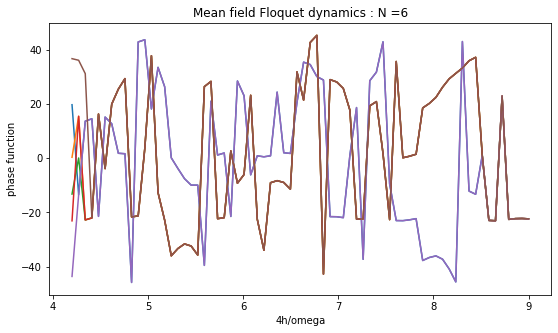

time taken 789.6245877742767 sec


In [20]:
# try to write specific path code into MULTI PROCESS code
# specific phase function path


#   NOW WE GIVE A TRY TO PLOT QUASI ENERGIES FOR A SPECIFIC PATH.
#   ACCORDING TO FLOQUET THEORY, AN  N X N UNITARY MATRIX IS CHOSEN INITIALLY, LETS CALL IT "S" MATRIX. EACH OF THE COLOUM
#   OF S MATRIX IS TAKEN AS THE INITIAL WAVE FUNCTION FOR EVOLVE. AFTER ONE PERIOD OF EVOLUTION WE GET AN N X 1 DIMENSIONAL
#   MATRIX WHICH IS THE WAVE FUNCITON DENOTING STATE OF THE SPIN SYSTEM AFTER ONE TIME PERIOD. SIMILAR WAY WE COLLECT ALL
#   OTHER "N" OF WAVE FUNCIOTN EACH WHICH IS BASICALLY COLUMN MATRIX. WE THEN BUILD ANOTHER N X N MATRIX.
#   LETS CALL THIS MATRIX AS "U" MATRIX. THE EIGEN FUNCTION OF U MATRIX 

import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eig
import math
import time

start = time.time() 

N = 6
h0 = 0.1
omega = 40
w = omega
tsteps = 1000
hsteps = 70
T = 10 * 2 * np.pi/w
t = np.linspace(0,T,tsteps)

hs = np.linspace(42,90,hsteps)
ampp = (np.ones((N,len(hs)))*hs).T
psi = np.eye(N) + (1j) * np.zeros((N,N))
floqEvolution_mat = np.zeros((N,N)) + (1j) * np.zeros((N,N))
phasefunc_path = np.zeros(len(hs))

title = "Mean field Floquet dynamics : N =" + str(N)

def delta_func(x,y):
        if ( x == y ):
            return 1.0
        else:
            return 0.0

def floq_jac(psi0, t, h, h0, H1, H0, w):    
    drive = h0 + h * np.cos(w * t)
    jac = 1j * N * (H0 + drive * H1)    
    return jac
        
def floq_func(psi0, t, h, h0, H1, H0, w):
    floq_h = np.dot(floq_jac(psi0, t, h, h0, H1, H0, w), psi0)
    return floq_h

def floq_proc(psi,H0,H1,h,w,nn):
    pp = nn
    labelname = 'wave func_' + str(nn)
    filename = str(N) + '_wave_' + str(nn)+ '.txt'
    
    # calculate for first "h"
    h = hs[0]           
    floqEvolution_mat = np.zeros((N,N)) + 1j * np.zeros((N,N))
    for mm in np.arange(N):
        psi0 = psi[mm]  
        psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w), Dfun=floq_jac)
        floqEvolution_mat[mm] = psi_t[-1]         
    evals, evecs = eig(floqEvolution_mat)
    evecs = np.asarray(list(map(lambda x :x/np.linalg.norm(x),evecs)))
    phasefunc = 2.303 * np.log(evals[nn] + 1j * 0) * 1j * omega/(2 * np.pi)
    evecs_path = evecs[nn]               
    phasefunc_path[0] = phasefunc.real
    
    # calculate for rest of the "h"
    for cc, h in enumerate(hs[1:len(hs)]):   
        floqEvolution_mat = np.zeros((N,N)) + 1j * np.zeros((N,N))        
        for mm in np.arange(N):
            psi0 = psi[mm]  
            psi_t = odeintw(floq_func,psi0,t,args=(h, h0, H1, H0, w), Dfun=floq_jac)
            floqEvolution_mat[mm] = psi_t[-1] 
        evals, evecs = eig(floqEvolution_mat)
        evecs = np.asarray(list(map(lambda x :x/np.linalg.norm(x),evecs)))
        prob = np.asarray(list(map(lambda x:np.dot(np.conjugate(evecs_path).T,x),evecs)))
        for i,pr in enumerate(prob):
            if (pr.real == max(prob.real)):
                pp = i
                break
        evecs_path = evecs[pp]
        phasefunc = 2.303 * np.log(evals[pp] + 1j * 0) * 1j * omega/(2 * np.pi)
        phasefunc_path[cc+1] = phasefunc.real
    return phasefunc_path
    
if __name__ == '__main__':     
    nprocs = 4
    p = Pool(processes = nprocs)          
    print("running for N = ", N, "with",nprocs,"processors")

    s = -0.5 + (1./N) * np.arange(N)
    H0 = np.diagflat(0.5 * (N * s) ** 2.0)
    
    sup_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i+1]) for i in range(N-1)])
    sub_diag = np.array([np.sqrt((N/2)*(1. + N/2) - N**2 * s[i] * s[i-1]) for i in range(N-1)])
    H1 = np.diagflat(sup_diag, k=1) + np.diagflat(sub_diag, k=-1)   
    
    print('run starts !!')

    data = p.starmap(floq_proc,[(psi,H0,H1,h,w,nn) for nn in np.arange(N)])

    plt.figure(figsize = (9,5))
    for i in np.arange(N):
        plt.plot(4 * hs/omega, data[i])
    plt.title(title)    
    plt.xlabel("4h/omega")
    plt.ylabel("phase function")
    plt.show()    

    print('time taken',time.time()-start,'sec')